<a href="https://colab.research.google.com/github/matthewmachnowski/us-accidents-analysis/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

## Information 
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. Currently, there are about 2.8 million accident records in this dataset.

## Acknowledgements
- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.




TODO - talk about EDA

TODO - talk about the dataset (sourse, what it contains, how it will be useful)
  - Kaggle
  - information about accidents 
  - can use useful to prevent accidents
  - mention that this does not contain data about New York

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url) 

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [3]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorret values

In [4]:
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
# Check the name and the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column

In [10]:
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [11]:
type(missing_percentage)

pandas.core.series.Series

In [12]:
df_missing = pd.DataFrame(missing_percentage[missing_percentage != 0]*100).reset_index()
df_missing.columns = ['Columns', 'Percentage (%)']
type(df_missing)

pandas.core.frame.DataFrame

In [43]:
!pip install "jupyterlab>=3" "ipywidgets>=7.6" --quiet

In [44]:
!pip install "notebook>=5.3" "ipywidgets>=7.5" --quiet

In [45]:
px.bar(df_missing, x='Percentage (%)', y='Columns', orientation='h')

- We can see that the Number column has over 60% data missing (61,29003%), Precipitation(in) and Wind_Chill(F) also have over 15% data missing. Since, Number column (which shows the street number) has majority of the data missing, we should drop it.

In [15]:
df = df.drop("Number", axis=1)

## Exploratory Analysis and Visualization

Columnscwe'll analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Tempeture
5. Weather Condition

### City

1. Which city in US has reported the most number of accident cases?

In [16]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [17]:
cities = df.City.unique()
len(cities)

11682

In [18]:
cities_by_accident = df.City.value_counts()
cities_by_accidentt = cities_by_accident[cities_by_accident>10000]

In [19]:
cities_by_accidentt = pd.DataFrame(cities_by_accidentt).reset_index()
cities_by_accidentt.columns = ['City', 'Accidents']
type(cities_by_accident)

pandas.core.series.Series

In [20]:
px.bar(cities_by_accidentt, x='Accidents', y='City', orientation='h')

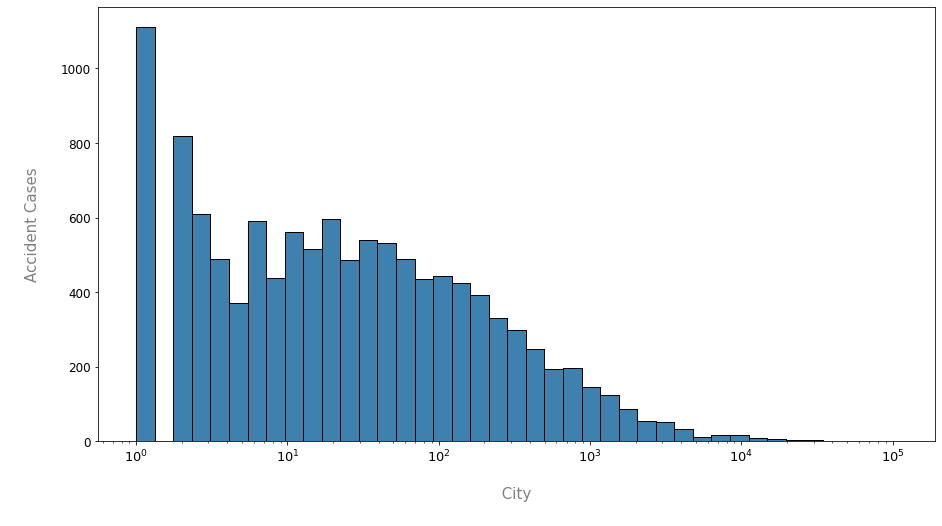

In [21]:
plt.figure(figsize=(15,8))
plt.xlabel('\n City \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.City.value_counts(),log_scale=True,color="grey")
sns.histplot(cities_by_accident, log_scale=True)
plt.show()

No of accidents in cities are exponentially decreasing. We see large accounts near to 1, possibly because of not data recorded there.

We have 1167 cities which recorded only 1 accident case, this is another data source drawback.

In [22]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Start Time

In [23]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [24]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [25]:
df.Start_Time = pd.to_datetime(df.Start_Time)

- Fiqure out how to show percentages

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



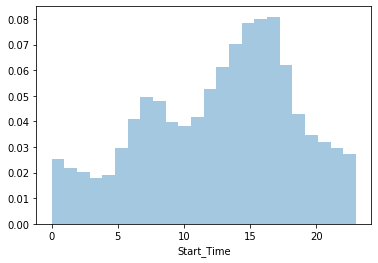

In [26]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occur between 14 pm to 19 pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



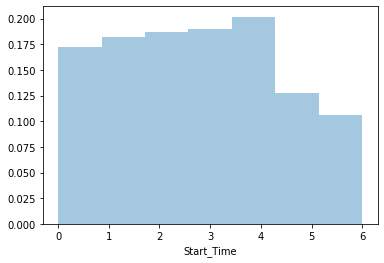

In [27]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distibution of accidents by hour the same on weekends as on weekdays. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



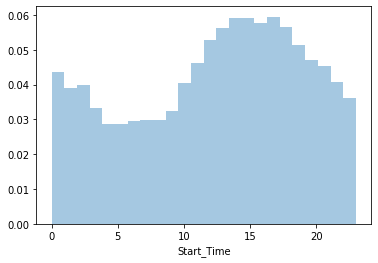

In [28]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



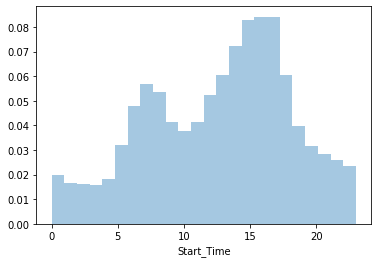

In [29]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 17 pm, unlike weekday.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



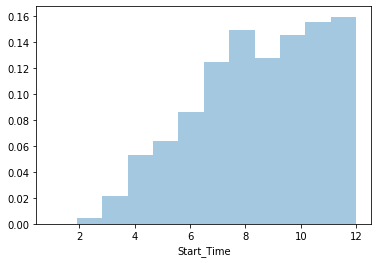

In [30]:
df_2019 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Can you explain the month-wise trend of accidents? 

- Much data is missing for 2016. Maybe even 2017.

## Start Latitude & Longitude

In [31]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [32]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [33]:
sample_df = df.sample(int(0.1 * len(df)))

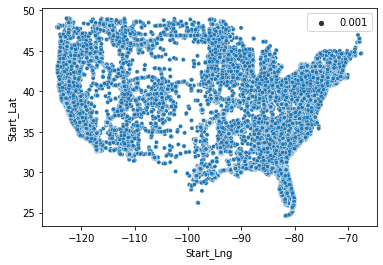

In [34]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [35]:
import folium

In [36]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [37]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
  print(x[1])

1937243    45.253480
1128509    40.351978
1969145    43.059550
1641393    34.934185
668391     40.153774
             ...    
14329      29.499240
339934     28.187199
941023     34.797806
409134     40.631829
1676300    36.352968
Name: Start_Lat, Length: 100, dtype: float64
1937243    -92.889742
1128509   -111.772338
1969145    -83.897041
1641393   -118.140549
668391    -110.243221
              ...    
14329      -95.111670
339934     -81.304362
941023     -82.435910
409134    -111.904646
1676300   -119.044325
Name: Start_Lng, Length: 100, dtype: float64


In [38]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [39]:
from folium.plugins import HeatMap

In [40]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))

In [41]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask & Questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states has the highest number of accidents? How about per capita?
3. Does New York ahop up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents yoer over year (decreasing/increasing?)
9. When is accident per unit the highest? 


## Summary and Conclusion 

Insights:
- No data for New York.
- The number of accodents per city decreases  exponentialy.
- Less then 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate).